In [1]:
import os
import sys
import glob
import scipy
import matplotlib
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns
from collections import defaultdict
from matplotlib import pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from shutil import copyfile
import scipy.stats

from tqdm import tqdm

%matplotlib inline
sns.set_style('whitegrid')
pd.set_option('display.max_rows', 100)
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['pdf.fonttype'] = 42
pd.set_option('display.max_columns', 100)

sys.path.append('/home/mattolm/Bio_scripts/')

import shutil
from IPython.display import display, HTML

from Bio import SeqIO

https://github.com/alexcritschristoph/wastewater_sarscov2

# LINKS TO DATA

In [2]:
INTRAPATIENT_SNVS_SAVE_LOCATION = '/groups/banfield/projects/industrial/wastewater_bayarea/2020/GithubRepo/wastewater_sarscov2/tables/Interpatient_SNVs_v2.csv.gz'
INTRAPATIENT_SNVS_SNPLEVEL_SAVE_LOCATION ='/groups/banfield/projects/industrial/wastewater_bayarea/2020/GithubRepo/wastewater_sarscov2/tables/Interpatient_SNVs_SNPlevel_v2.csv.gz'

WASTEWATER_SNVS_SAVELOC = '/groups/banfield/projects/industrial/wastewater_bayarea/2020/GithubRepo/wastewater_sarscov2/tables/Wastewater_SNVs_v2.csv'
WASTEWATER_ABUND_SAVELOC = '/groups/banfield/projects/industrial/wastewater_bayarea/2020/GithubRepo/wastewater_sarscov2/tables/Wastewater_abundance_v2.csv'

WASTEWATER_METADATA = '/groups/banfield/projects/industrial/wastewater_bayarea/2020/GithubRepo/wastewater_sarscov2/data/wastewater/sample_metadata.txt'

In [204]:
fig_loc = '/groups/banfield/projects/industrial/wastewater_bayarea/2020/GithubRepo/wastewater_sarscov2/figures/raw_figures/'

# Load wastewater SNVs

In [4]:
WSdb = pd.read_csv(WASTEWATER_SNVS_SAVELOC)
for c in ['key']:
    WSdb[c] = [eval(x) for x in WSdb[c]]
    
Adb = pd.read_csv(WASTEWATER_ABUND_SAVELOC)
WSdb['coverage'] = WSdb['sample'].map(Adb.set_index('sample')['coverage'].to_dict())
    
WSdb

,scaffold,position,refBase,A,C,T,G,conBase,varBase,allele_count,cryptic,baseCoverage,varFreq,conFreq,refFreq,sample,key,key_freq,coverage
0,hCoV-19_Wuhan_WIV04_2019_EPI_ISL_402124_2019-1...,33,A,6,0,2,0,A,T,2,False,8,0.250000,0.750000,0.750000,6_30_S_MOS,"(33, T)",0.250000,33.796247
1,hCoV-19_Wuhan_WIV04_2019_EPI_ISL_402124_2019-1...,34,A,5,0,2,0,A,T,2,False,7,0.285714,0.714286,0.714286,6_30_S_MOS,"(34, T)",0.285714,33.796247
2,hCoV-19_Wuhan_WIV04_2019_EPI_ISL_402124_2019-1...,35,C,0,7,2,0,C,T,2,False,9,0.222222,0.777778,0.777778,6_30_S_MOS,"(35, T)",0.222222,33.796247
3,hCoV-19_Wuhan_WIV04_2019_EPI_ISL_402124_2019-1...,240,C,0,1,31,0,T,C,1,False,32,0.031250,0.968750,0.031250,6_30_S_MOS,"(240, T)",0.968750,33.796247
4,hCoV-19_Wuhan_WIV04_2019_EPI_ISL_402124_2019-1...,1025,C,0,24,2,0,C,T,2,False,26,0.076923,0.923077,0.923077,6_30_S_MOS,"(1025, T)",0.076923,33.796247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,hCoV-19_Wuhan_WIV04_2019_EPI_ISL_402124_2019-1...,28377,G,0,0,8,20,G,T,2,False,28,0.285714,0.714286,0.714286,6_09_S,"(28377, T)",0.285714,7.075737
332,hCoV-19_Wuhan_WIV04_2019_EPI_ISL_402124_2019-1...,28880,G,18,0,0,7,A,G,2,False,25,0.280000,0.720000,0.280000,6_09_S,"(28880, A)",0.720000,7.075737
333,hCoV-19_Wuhan_WIV04_2019_EPI_ISL_402124_2019-1...,28881,G,18,0,0,7,A,G,2,False,25,0.280000,0.720000,0.280000,6_09_S,"(28881, A)",0.720000,7.075737
334,hCoV-19_Wuhan_WIV04_2019_EPI_ISL_402124_2019-1...,28882,G,0,18,0,7,C,G,2,False,25,0.280000,0.720000,0.280000,6_09_S,"(28882, C)",0.720000,7.075737


# Load interpatient SNVs

In [5]:
ISdb = pd.read_csv(INTRAPATIENT_SNVS_SAVE_LOCATION)
for c in ['SNP_IDs']:
    ISdb[c] = [eval(x) for x in ISdb[c]]


IVdb = pd.read_csv(INTRAPATIENT_SNVS_SNPLEVEL_SAVE_LOCATION)
for c in ['SNP', 'strains']:
    IVdb[c] = [eval(x) for x in IVdb[c]]
IVdb['key'] = [(s[0], s[2]) for s in IVdb['SNP']]

In [62]:
def adj(keys):
    return set([(s[0], s[2]) for s in keys])

ISdb['key_IDs'] = [adj(s) for s in ISdb['SNP_IDs']]

## Load intrapatient SNVs

In [6]:
pass

## Load metadata

In [177]:
Mdb = pd.read_csv(WASTEWATER_METADATA, sep='\t')
Mdb['name'] = ["{0} {1}".format(l, d) for l, d in zip(Mdb['location'], Mdb['date'])]
Mdb['name'].iloc[1] = 'Oakland 5-19 (2)'
Mdb['name'].iloc[5] = 'Oakland 6-30 (2)'

sample_dates = { '5_19_S_2': "2020-05-19", '5_28_S': "2020-05-28", 'SQ_7_1_MOS': "2020-07-01", '5_19_S': "2020-05-19", '6_30_S_COL': "2020-06-30",
       '6_09_S': "2020-06-09", 'MR_7_1_MOS': "2020-07-01", '6_30_S_MOS': "2020-06-30" }
Mdb['date'] = Mdb['sample'].map(sample_dates)
Mdb['date'] = pd.to_datetime(Mdb['date']) 

Mdb

,sample,location,date,name
0,5_19_S_2,Oakland,2020-05-19,Oakland 5-19
1,5_19_S,Oakland,2020-05-19,Oakland 5-19 (2)
2,5_28_S,Oakland,2020-05-28,Oakland 5-28
3,6_09_S,Oakland,2020-06-09,Oakland 6-09
4,6_30_S_COL,Oakland,2020-06-30,Oakland 6-30
5,6_30_S_MOS,Oakland,2020-06-30,Oakland 6-30 (2)
6,MR_7_1_MOS,Marin,2020-07-01,Marin 7-1
7,SQ_7_1_MOS,SanQuentin,2020-07-01,SanQuentin 7-1


## Figure 2d - Temporal

<ipython-input-63-79a431fff73e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CAdb['date'] = pd.to_datetime(CAdb['date'])


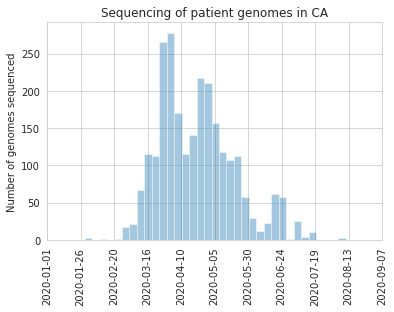

In [63]:
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

# Get california genomes
recurrent_snps = set(WSdb[WSdb['key'].isin(WSdb['key'].value_counts()[WSdb['key'].value_counts() > 1].index)]['key'].tolist())
CAdb = ISdb[(ISdb['division'] == 'California') & (CAdb['region_exposure'] == 'North America')]
CAdb['date'] = pd.to_datetime(CAdb['date']) 

# Plot dates
ordinal_dates = np.array([d.toordinal() for d in CAdb['date']])
sns.distplot(ordinal_dates, kde=False)

# Adjust
ticks_locations, _ = plt.xticks();
labels = [datetime.datetime.fromordinal(int(t)).date() for t in ticks_locations]
plt.xticks(ticks_locations, labels, rotation=90)
plt.title("Sequencing of patient genomes in CA")
plt.ylabel("Number of genomes sequenced")
plt.show()

In [91]:
# Get base P/E counts
dbs = []
for snp in recurrent_snps:
    CAdb['got'] = [snp in x for x in CAdb['key_IDs']]
    db = CAdb[['got', 'date']]
    db['snp'] = str(snp)
    dbs.append(db)
Tdb = pd.concat(dbs).reset_index(drop=True)
Tdb['got'].value_counts()

# Calculate over sliding windows
WINDOW_LEN = 14
table = defaultdict(list)
r = pd.date_range(start='2020-03-01', end='2020-08-01')
L = [(d.strftime('%Y-%m-%d'), (d + pd.Timedelta(WINDOW_LEN, 'd')).strftime('%Y-%m-%d')) for d in r]
for time_range in L:
    tdb = Tdb[(Tdb['date'] >= time_range[0]) & (Tdb['date'] < time_range[-1])]
    for snp, db in tdb.groupby('snp'):
        table['date_start'].append(time_range[0])
        table['date_end'].append(time_range[-1])
        table['snp'].append(snp)
        table['genomes'].append(len(db))
        table['frequency'].append(len(db[db['got'] == True])/len(db))
Wdb = pd.DataFrame(table)
Wdb['date_start'] = pd.to_datetime(Wdb['date_start']) 

<ipython-input-91-b8c1d3fd2810>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CAdb['got'] = [snp in x for x in CAdb['key_IDs']]
<ipython-input-91-b8c1d3fd2810>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db['snp'] = str(snp)


In [181]:
# Filter to only interesting SNPs
keepers = []
for snp, db in Wdb.groupby('snp'):
    if len(db[db['frequency'] > 0.2]) > 1:
        keepers.append(snp)
WFdb = Wdb[Wdb['snp'].isin(keepers)]
WFdb['loc'] = [eval(s)[0] for s in WFdb['snp']]
WFdb = WFdb.sort_values('loc')
print("{0} interesting SNPs".format(len(WFdb['snp'].unique())))

# Get wastewater frequencies
WAFdb = WSdb[[str(x) in keepers for x in WSdb['key']]]
WAFdb = pd.merge(WAFdb, Mdb, on='sample', how='left')
#WAFdb = WAFdb.sort_values('baseCoverage').drop_duplicates(subset='key', keep='last')
WAFdb['snp'] = WAFdb['key'].astype(str)

# Set up colors
colors = sns.color_palette("Set1")
snp2color = {s:colors[i] for i, s in enumerate(keepers)}

9 interesting SNPs


<ipython-input-181-e4e28062f8db>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WFdb['loc'] = [eval(s)[0] for s in WFdb['snp']]


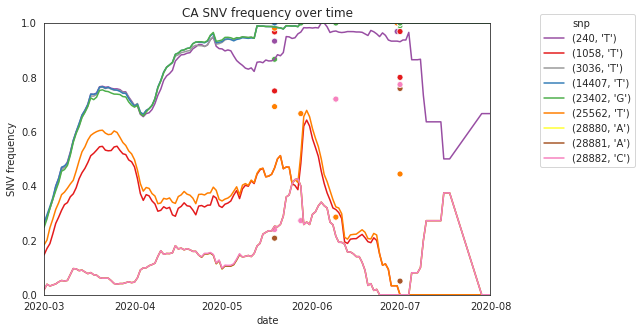

In [182]:
sns.set_style('white')

sns.lineplot(data=WFdb, x='date_start', y='frequency', hue='snp', palette=snp2color)
sns.scatterplot(data=WAFdb, x='date', y='key_freq', hue='snp', palette=snp2color, legend=False)
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.gcf().set_size_inches(8, 5)

plt.ylabel("SNV frequency")
plt.title("CA SNV frequency over time")
plt.ylim(0, 1)
plt.xlim(r[0], r[-1])

plt.show()

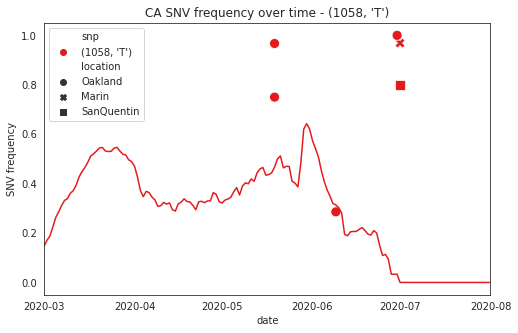

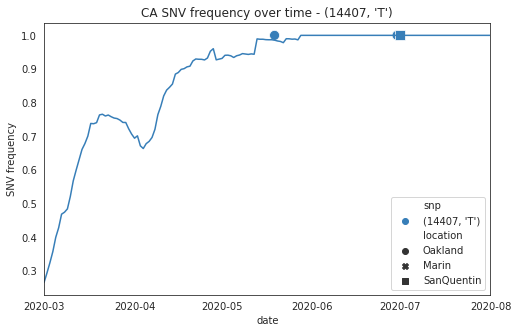

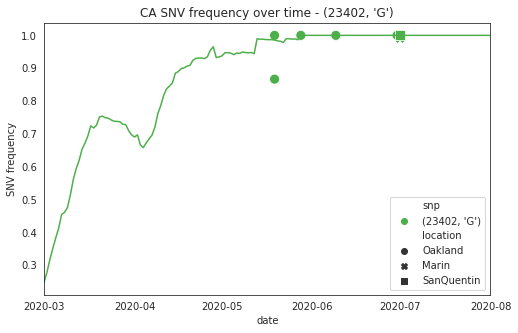

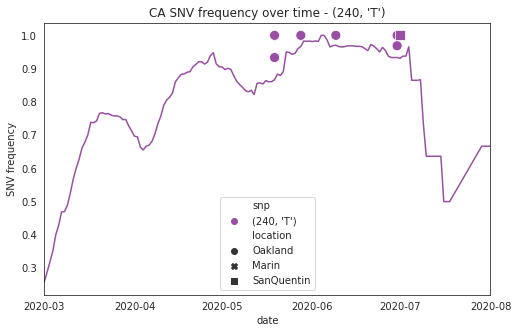

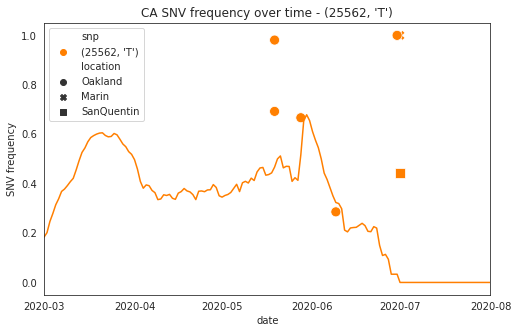

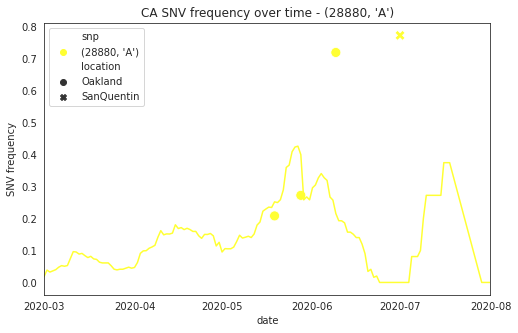

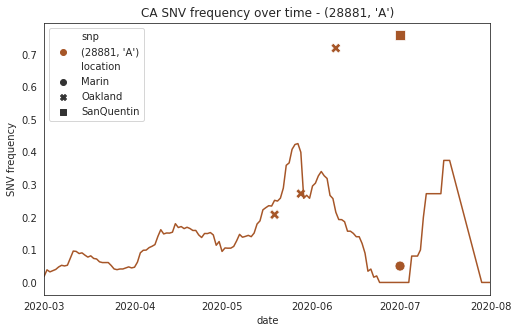

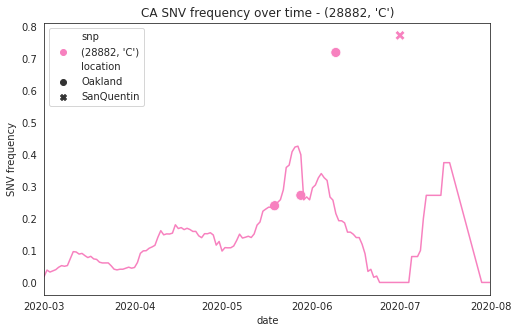

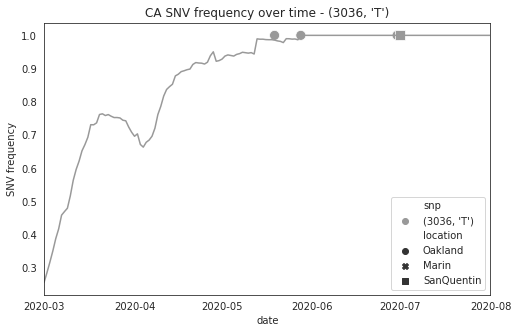

In [188]:
sns.set_style('white')

for snp in keepers:
    db1 = WFdb[WFdb['snp'] == snp]
    db2 = WAFdb[WAFdb['snp'] == snp]
    
    sns.lineplot(data=db1, x='date_start', y='frequency', hue='snp', palette=snp2color, legend=False)
    sns.scatterplot(data=db2, x='date', y='key_freq', hue='snp', style='location', palette=snp2color, legend='full', s=100, linewidths=20, edgecolors='black')
    #plt.legend(bbox_to_anchor=(1.1, 1.05))
    plt.gcf().set_size_inches(8, 5)

    plt.ylabel("SNV frequency")
    plt.title("CA SNV frequency over time - {0}".format(snp))
    #plt.ylim(0, 1.1)
    plt.xlim(r[0], r[-1])

    plt.show()

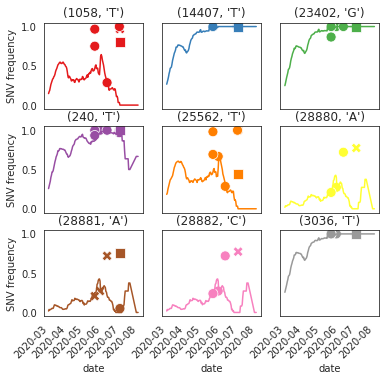

In [205]:
# Establish subplots
sns.set_style('white')
rows = int(len(WFdb['snp'].unique()) / 3)
fig, axs = plt.subplots(
    rows, 3, figsize=(6, 6), sharex=True, sharey=True)#, gridspec_kw={"height_ratios": [4, 2, 2]}

# Plot
i = 0
for snp in keepers:
    ax = axs[int(i/3), i%3]
    
    db1 = WFdb[WFdb['snp'] == snp]
    db2 = WAFdb[WAFdb['snp'] == snp]
    
    sns.lineplot(data=db1, x='date_start', y='frequency', hue='snp', palette=snp2color, legend=False, ax=ax)
    sns.scatterplot(data=db2, x='date', y='key_freq', hue='snp', style='location', palette=snp2color, legend=False, s=100, linewidths=20, edgecolors='black',ax=ax)
    
    ax.set_title(snp)
    ax.set_ylabel('SNV frequency')
    #ax.set_xticks(rotation=90)
    
    i += 1
    
#plt.xticks(rotation=90)
fig.autofmt_xdate(rotation=45)

plt.gcf().savefig(fig_loc + 'Figure2d_v1.pdf', bbox_inches='tight')
plt.show()

In [206]:
print(fig_loc + 'Figure2d_v1.pdf')

/groups/banfield/projects/industrial/wastewater_bayarea/2020/GithubRepo/wastewater_sarscov2/figures/raw_figures/Figure2d_v1.pdf
